In [1]:
#Imports
from random import randrange
from sklearn.metrics import mean_squared_error,r2_score
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load DataFrame
df = pd.read_csv('../raw_data/stock_prices_latest.csv',nrows=20000)

In [3]:
#Have a look at data
df

,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient
0,MSFT,2016-05-16,50.80,51.96,50.75,51.83,49.7013,20032017,1.0
1,MSFT,2002-01-16,68.85,69.84,67.85,67.87,22.5902,30977700,1.0
2,MSFT,2001-09-18,53.41,55.00,53.17,54.32,18.0802,41591300,1.0
3,MSFT,2007-10-26,36.01,36.03,34.56,35.03,27.2232,288121200,1.0
4,MSFT,2014-06-27,41.61,42.29,41.51,42.25,38.6773,74640000,1.0
...,...,...,...,...,...,...,...,...,...
19995,AAL,2011-07-29,5.92,6.29,5.77,6.24,6.0345,28134584,1.0
19996,AAL,2008-05-22,5.57,5.79,5.14,5.22,5.0481,18112064,1.0
19997,AAL,2006-02-22,33.53,34.30,33.30,33.64,32.5323,1708311,1.0
19998,AAL,2007-03-21,49.00,49.73,48.13,49.41,47.7830,5568097,1.0


In [4]:
#Convert to datetime
df['date'] = pd.to_datetime(df['date'])

In [5]:
def get_symbols_lst():
    lst=df.symbol.unique()
    symbols_lst=[]
    while len(symbols_lst)<3:
        symbol=lst[randrange(len(lst))]
        if symbol not in symbols_lst:
            symbols_lst.append(symbol)
        symbol=lst[randrange(len(lst))]
    return symbols_lst

In [6]:
symbols_lst=get_symbols_lst()

In [7]:
symbols_lst

['EBAY', 'MSFT', 'AAPL']

In [8]:
#Create Df's to plot (MSFT uniquement pour le BASELINE)
df0=df[df['symbol']==symbols_lst[0]].reset_index()
df0 = df0[(df0.date.dt.year >= 2017 ) & (df0.date.dt.year <= 2018)]
df0 = df0[['date','close_adjusted']]
df0.columns = ['ds', 'y']
df0.sort_values(by=['ds'],inplace=True)

df1=df[df['symbol']==symbols_lst[1]].reset_index()
df1 = df1[(df1.date.dt.year >= 2017 ) & (df1.date.dt.year <= 2018)]
df1 = df1[['date','close_adjusted']]
df1.columns = ['ds', 'y']
df1.sort_values(by=['ds'],inplace=True)

df2=df[df['symbol']==symbols_lst[2]].reset_index()
df2 = df2[(df2.date.dt.year >= 2017 ) & (df2.date.dt.year <= 2018)]
df2 = df2[['date','close_adjusted']]
df2.columns = ['ds', 'y']
df2.sort_values(by=['ds'],inplace=True)

# Baseline

In [9]:
#Create Baseline df's
df0.reset_index(inplace=True)

In [10]:
df0.drop(['index'],axis=1,inplace=True)

In [11]:
df0

,ds,y
0,2017-01-03,29.8400
1,2017-01-04,29.7600
2,2017-01-05,30.0100
3,2017-01-06,31.0500
4,2017-01-09,30.7500
...,...,...
262,2018-01-18,38.7400
263,2018-01-19,38.4300
264,2018-01-22,39.5800
265,2018-01-23,39.7700


In [12]:
for i in df0['y'].index:
    if i > 0:
        df0['yhat']=df0['y'].shift(1)

In [13]:
df0.dropna(inplace=True)

In [14]:
df0

,ds,y,yhat
1,2017-01-04,29.7600,29.84
2,2017-01-05,30.0100,29.76
3,2017-01-06,31.0500,30.01
4,2017-01-09,30.7500,31.05
5,2017-01-10,30.2500,30.75
...,...,...,...
262,2018-01-18,38.7400,37.99
263,2018-01-19,38.4300,38.74
264,2018-01-22,39.5800,38.43
265,2018-01-23,39.7700,39.58


In [15]:
print("r2_score close :", r2_score(df0['y'], df0['yhat']))
print('Close MSE: :',mean_squared_error(df0['y'], df0['yhat']))

r2_score close : 0.9620358300395397
Close MSE: : 0.19619616545112775


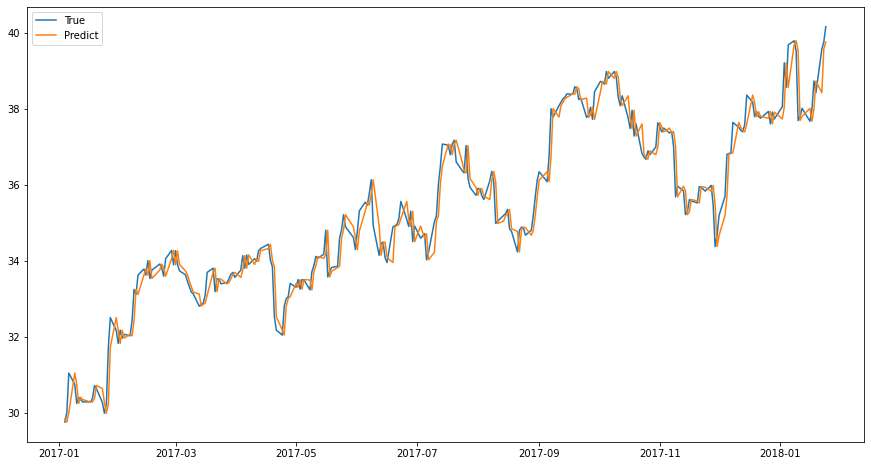

In [16]:
# plot predictions and expected results
plt.figure(figsize=(15, 8))               
plt.plot(df0['ds'],df0['y'],label="True")
plt.plot(df0['ds'],df0['yhat'],label="Predict")
plt.legend()
plt.show()

# Model


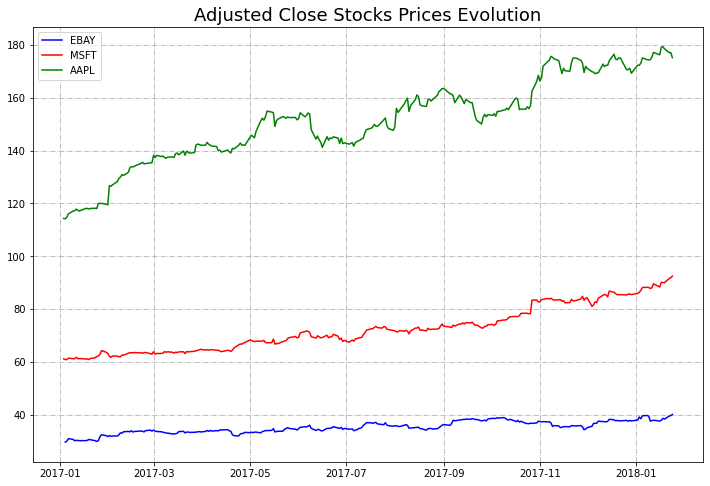

In [17]:
#Plot datas
plt.figure(figsize=(12, 8))
plt.grid(linestyle='-.')
plt.plot(df0['ds'], df0['y'], 'b',label=symbols_lst[0])
plt.plot(df1['ds'], df1['y'], 'r',label=symbols_lst[1])
plt.plot(df2['ds'], df2['y'], 'g',label=symbols_lst[2])
plt.title('Adjusted Close Stocks Prices Evolution',size=18)
plt.legend()
plt.show()

## FB Prophet

In [24]:
from prophet import Prophet
m2= Prophet(yearly_seasonality=False,
            weekly_seasonality=False,
           daily_seasonality=False)

In [25]:
m2.fit(df0)

In [26]:
future = m2.make_future_dataframe(periods=10, freq='D')
fcst = m2.predict(future)

In [27]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m2, fcst)

In [29]:
plot_components_plotly(m2, fcst)